In [2]:
%pylab inline
import pylab
from sklearn.datasets import fetch_mldata
DATA_PATH = '~/data'
mnist = fetch_mldata('MNIST original', data_home=DATA_PATH) 

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [4]:
mnist.data.shape

(70000, 784)

In [61]:
train=mnist.data[:60000]
test=mnist.data[60000:]

### Question 1:

By explore several data rows in mnist, we find that the number of images are ordered in ascending orders in both train set and test set.

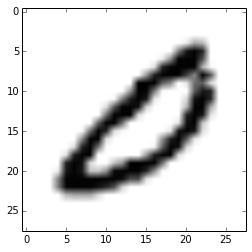

In [47]:
pylab.imshow(mnist.data[5920].reshape(28,28),cmap="Greys")

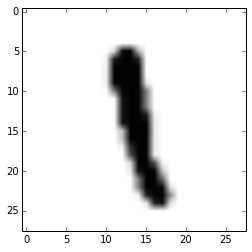

In [48]:
pylab.imshow(mnist.data[7000].reshape(28,28),cmap="Greys")

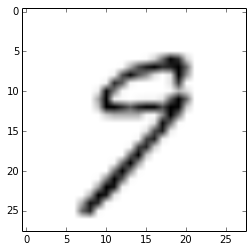

In [51]:
pylab.imshow(mnist.data[59999].reshape(28,28),cmap="Greys")

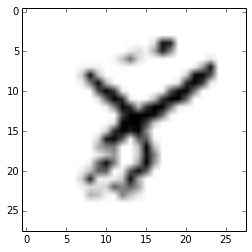

In [60]:
pylab.imshow(mnist.data[68959].reshape(28,28),cmap="Greys")

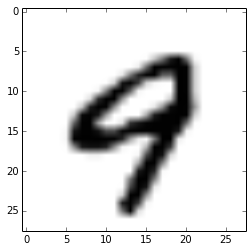

In [35]:
pylab.imshow(mnist.data[69999].reshape(28,28),cmap="Greys")

In [62]:
%%time
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute').fit(train)

CPU times: user 19.5 ms, sys: 10.8 ms, total: 30.2 ms
Wall time: 428 ms


In [63]:
%%time
query_img = test[0]
_, result = model.kneighbors(query_img, n_neighbors=4)

CPU times: user 124 ms, sys: 146 ms, total: 270 ms
Wall time: 442 ms


In [64]:
result

array([[2857, 5849, 3393, 3209]])

In [65]:
# Display several images in a row
def show(imgs, n=1):
    fig = pylab.figure()
    for i in xrange(0, n):
        fig.add_subplot(1, n, i+1, xticklabels=[], yticklabels=[])
        if n == 1:
            img = imgs
        else:
            img = imgs[i]
        pylab.imshow(img.reshape(28, 28), cmap="Greys")

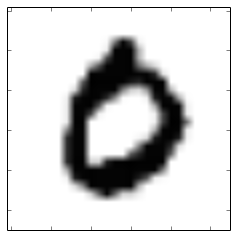

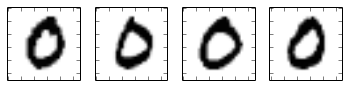

In [66]:
show(query_img)
show(train[result[0],:], len(result[0]))

### Quetion 2:

Use the nearest neighbors model to inspect results for other images in the test set. Do all of the digits seem to perform as well as "0" does?

Like the examples below, we can see that not all the digtis seem to perform as well as '0' does.

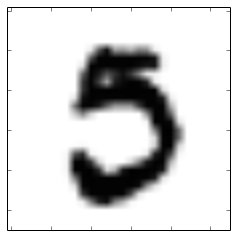

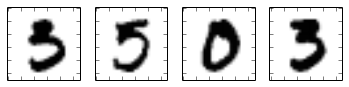

In [71]:
query_img = test[5400]
_, result = model.kneighbors(query_img, n_neighbors=4)
show(query_img)
show(train[result[0],:], len(result[0]))

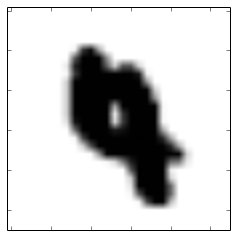

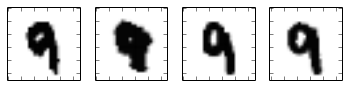

In [72]:
query_img = test[5000]
_, result = model.kneighbors(query_img, n_neighbors=4)
show(query_img)
show(train[result[0],:], len(result[0]))

In [85]:
train_labels = mnist.target[:60000]
test_labels = mnist.target[60000:]

In [86]:
%%time
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4, algorithm='brute').fit(train, train_labels)

CPU times: user 3.59 ms, sys: 109 µs, total: 3.7 ms
Wall time: 15 ms


In [87]:
test_sample = test[::100]
test_labels_sample = test_labels[::100]

In [88]:
%%time
# Score the model!
model.score(test_sample, test_labels_sample)

CPU times: user 591 ms, sys: 52.5 ms, total: 644 ms
Wall time: 738 ms


0.96999999999999997

(100, 784)
0.03


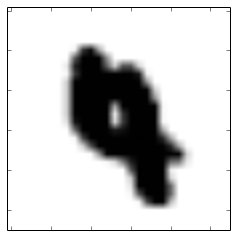

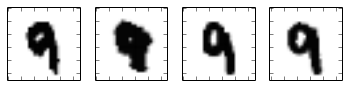

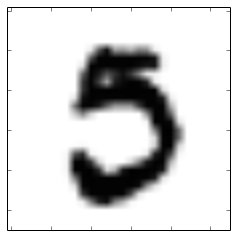

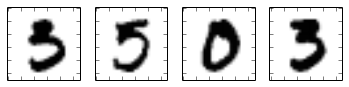

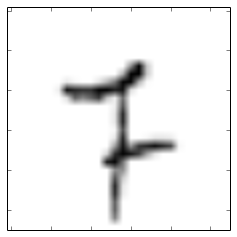

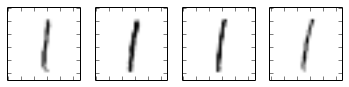

In [95]:
preds = model.predict(test_sample)
print test_sample.shape

errors = [i for i in xrange(0, len(test_sample)) if preds[i] != test_labels_sample[i]]
err_rate = float(len(errors))/len(preds)
print err_rate

for i in errors:
    query_img = test_sample[i]
    _, result = model.kneighbors(query_img, n_neighbors=4)
    show(query_img)
    show(train[result[0],:], len(result[0]))

In [96]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels_sample, preds)

array([[10,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 12,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 10,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  9,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  1,  0,  8,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  9,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 10,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 10]])

### Question 3:

Apply Naive Bayes, SVM (linear kernel) and Logistic Regression classification models on the following training/testing data, and for each of the model please train the model using training data and test the model with testing data, then report the following:

error rate of the model on testing data.

confusion matrix.

identify the pairs of digits most frequently confused with each other.

Note: all models should use default parameters of scikit (except SVM should use linear kernel).

In [97]:
#import models
from sklearn import naive_bayes, svm, linear_model

In [112]:
# For traning
train_sample = train[::100]
train_sample_labels = train_labels[::100]
# for testing
test_sample = test[::10]
test_sample_labels = test_labels[::10]

#### Applying Naive Bayes classification model

In [120]:
model = naive_bayes.BernoulliNB().fit(train_sample, train_sample_labels)
preds = model.predict(test_sample)

errors = [i for i in xrange(0, len(test_sample)) if preds[i] != test_sample_labels[i]]
err_rate = float(len(errors))/len(preds)
print err_rate

confusion_matrix(test_sample_labels, preds)


0.191


array([[ 93,   0,   0,   0,   0,   2,   2,   0,   1,   0],
       [  0, 111,   1,   0,   0,   0,   1,   0,   1,   0],
       [  2,   2,  83,   5,   1,   0,   2,   3,   5,   0],
       [  1,   2,   9,  71,   0,   1,   1,   4,   9,   3],
       [  0,   1,   1,   0,  76,   0,   4,   1,   3,  12],
       [  5,   2,   2,  16,   1,  47,   2,   0,  11,   4],
       [  1,   0,   0,   0,   2,   1,  88,   0,   3,   0],
       [  0,   1,   3,   0,   2,   0,   0,  82,   3,  12],
       [  3,   2,   0,   6,   1,   1,   2,   1,  79,   3],
       [  3,   1,   0,   1,   9,   1,   0,   3,   3,  79]])

pair of 4 & 9 are confused with each other most frequently

#### Applying svm (using linera kernel) classification model

In [117]:
model = svm.LinearSVC().fit(train_sample, train_sample_labels)
preds = model.predict(test_sample)

errors = [i for i in xrange(0, len(test_sample)) if preds[i] != test_sample_labels[i]]
err_rate = float(len(errors))/len(preds)
print err_rate

confusion_matrix(test_sample_labels, preds)


0.187


array([[ 93,   0,   0,   1,   0,   0,   2,   1,   1,   0],
       [  0, 110,   0,   1,   0,   0,   1,   0,   2,   0],
       [  2,   3,  83,   5,   1,   0,   1,   1,   5,   2],
       [  1,   0,   7,  73,   1,   4,   1,   3,   6,   5],
       [  0,   0,   0,   0,  81,   1,   4,   0,   4,   8],
       [  3,   0,   0,   2,   1,  61,   5,   3,  12,   3],
       [  1,   1,   0,   0,   3,   1,  87,   0,   2,   0],
       [  0,   1,   3,   1,   2,   0,   0,  89,   2,   5],
       [  1,   2,   1,   4,   3,   7,   4,   3,  68,   5],
       [  3,   1,   2,   3,   9,   1,   1,   6,   6,  68]])

pair of 5 & 8 are confused with each other most frequently

#### Applying Logistic Regression classification model

In [115]:
model = linear_model.LogisticRegression().fit(train_sample, train_sample_labels)
preds = model.predict(test_sample)

errors = [i for i in xrange(0, len(test_sample)) if preds[i] != test_sample_labels[i]]
err_rate = float(len(errors))/len(preds)
print err_rate

confusion_matrix(test_sample_labels, preds)


0.178


array([[ 94,   0,   0,   0,   0,   0,   2,   1,   1,   0],
       [  0, 111,   0,   1,   0,   0,   1,   0,   1,   0],
       [  2,   3,  83,   5,   1,   0,   1,   1,   5,   2],
       [  1,   0,   6,  74,   1,   3,   1,   4,   6,   5],
       [  0,   0,   0,   0,  80,   0,   4,   1,   5,   8],
       [  4,   0,   1,   1,   1,  65,   4,   2,   9,   3],
       [  1,   1,   0,   0,   3,   1,  87,   0,   2,   0],
       [  0,   1,   3,   1,   2,   0,   0,  89,   2,   5],
       [  2,   2,   1,   3,   3,   5,   5,   3,  69,   5],
       [  3,   1,   2,   3,   7,   1,   1,   5,   7,  70]])

pair of 4 & 9 are confused with each other most frequently